# The following is the skeleton code for DynBandit env

In [1]:
# Gym Template for DynBandit Env Prepared by Kui Wu
# Since we do not publish the DynBandit Env, no need to register for it to Gym. 

import numpy as np 
import matplotlib.pyplot as plt
import gym
import random
import time

from gym import Env, spaces

class DynBandit(Env):
    def __init__(self):
        # Define the observation space, there are five arms, each having two possible state.
        self.observation_space = spaces.Tuple((spaces.Discrete(2), spaces.Discrete(2), spaces.Discrete(2),
                spaces.Discrete(2), spaces.Discrete(2)))
          
        # Define an action space ranging from 0 to 4, 0: the first arm, ... 4: the fifth arm
        self.action_space = spaces.Discrete(5)
        
        # STUDENT CODE HERE
        # initialization with the given parameters specified in Assignment 1. Hard-coding the parameters here is fine 
        self.arm_pos = [0,0,0,0,0]
        self.mean_high = [2,4,6,8,10]
        self.mean_low = [0,1,2,3,1]
        
    def reset(self):
        # STUDENT CODE HERE   
        # An episode is over, initialization for running next episode
        ## Important note: for each new episode, you must reset the random seed to a different value. 
        ## Otherwise, your episodes are not independent. This is a common error in statistical inference-based learning. 
        ## For example, you can use np.random.seed(time.time()) to avoid the problem. 
        self.arm_pos = [0,0,0,0,0]
        np.random.seed(int(time.time()))
        
        
    def _get_obs(self):
        pass # We assume the bandit does not disclose state information. 
    
    def step(self, action):
        done = False
        reward = None
        # Assert that it is a valid action 
        assert self.action_space.contains(action), "Invalid Action"
        
        # STUDENT CODE HERE: 
        # apply the action, generate the corresponding reward, and update the state of the arm. 
        if action == 0:
            reward = np.random.normal(self.mean_high[0], 1) if self.arm_pos[0] == 0 else np.random.normal(self.mean_low[0], 1)     
            prob = np.random.uniform(0,1)
            if prob>=0.6:
                self.arm_pos[0] = 1 - self.arm_pos[0]
        elif action == 1:
            reward = np.random.normal(self.mean_high[1], 1) if self.arm_pos[1] == 0 else np.random.normal(self.mean_low[1], 1)     
            prob = np.random.uniform(0,1)
            if prob>=0.6:
                self.arm_pos[1] = 1 - self.arm_pos[1]
        elif action == 2:
            reward = np.random.normal(self.mean_high[2], 1) if self.arm_pos[2] == 0 else np.random.normal(self.mean_low[2], 1)     
            prob = np.random.uniform(0,1)
            if prob>=0.6:
                self.arm_pos[2] = 1 - self.arm_pos[2]
        elif action == 3:
            reward = np.random.normal(self.mean_high[3], 1) if self.arm_pos[3] == 0 else np.random.normal(self.mean_low[3], 1)     
            prob = np.random.uniform(0,1)
            if prob>=0.6:
                self.arm_pos[3] = 1 - self.arm_pos[3]
        elif action == 4:
            reward = np.random.normal(self.mean_high[4], 1) if self.arm_pos[4] == 0 else np.random.normal(self.mean_low[4], 1)     
            prob = np.random.uniform(0,1)
            if prob>=0.6:
                self.arm_pos[4] = 1 - self.arm_pos[4]
        
        return [], reward, done, []
                    
        
        

# The following is the template code of RL agent: 


<Figure size 2160x720 with 0 Axes>

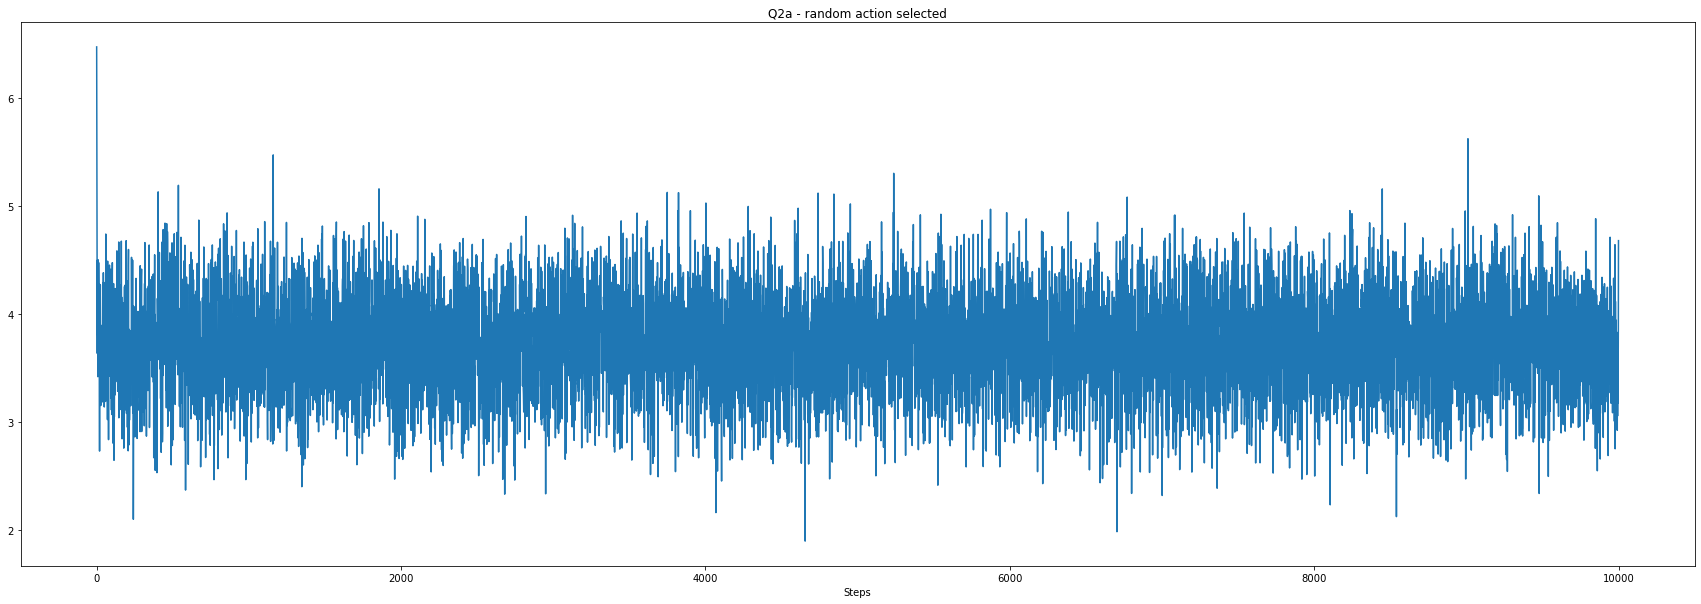

<Figure size 2160x720 with 0 Axes>

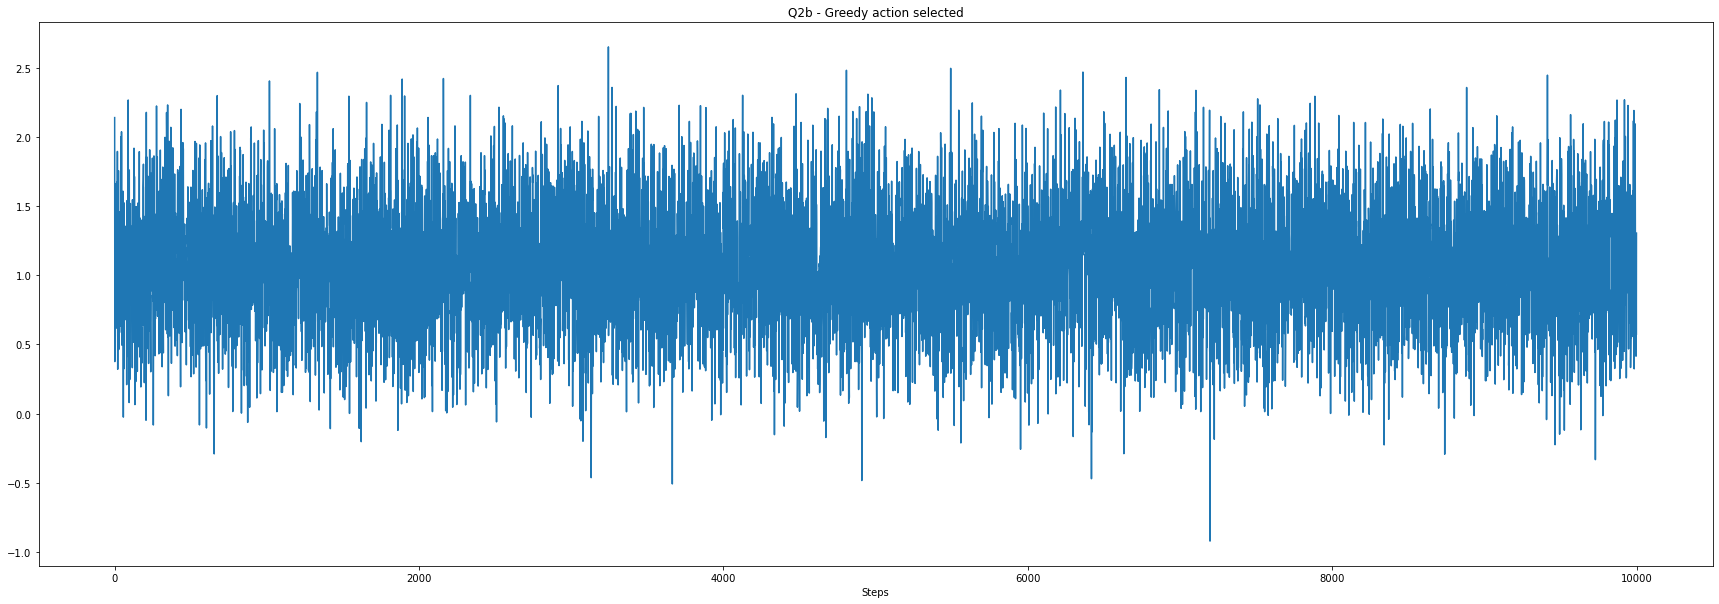

<Figure size 2160x720 with 0 Axes>

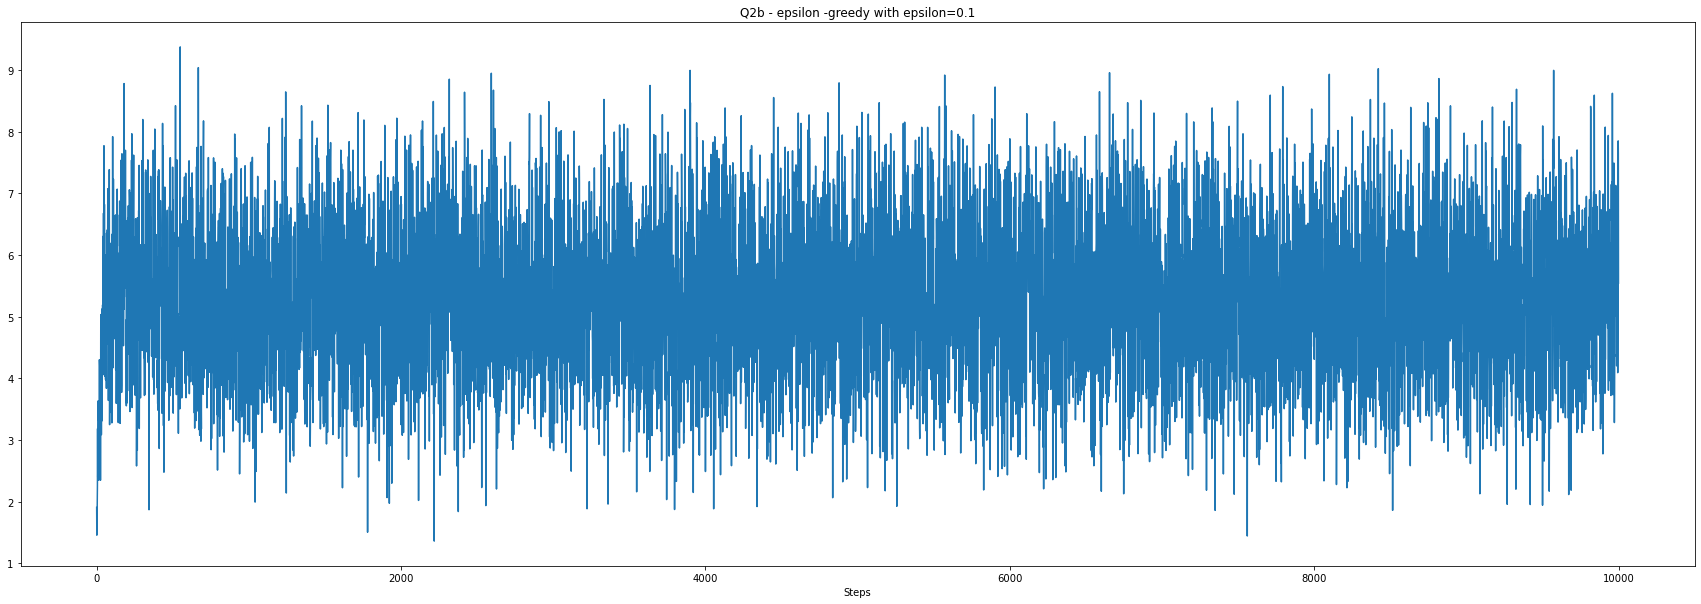

<Figure size 2160x720 with 0 Axes>

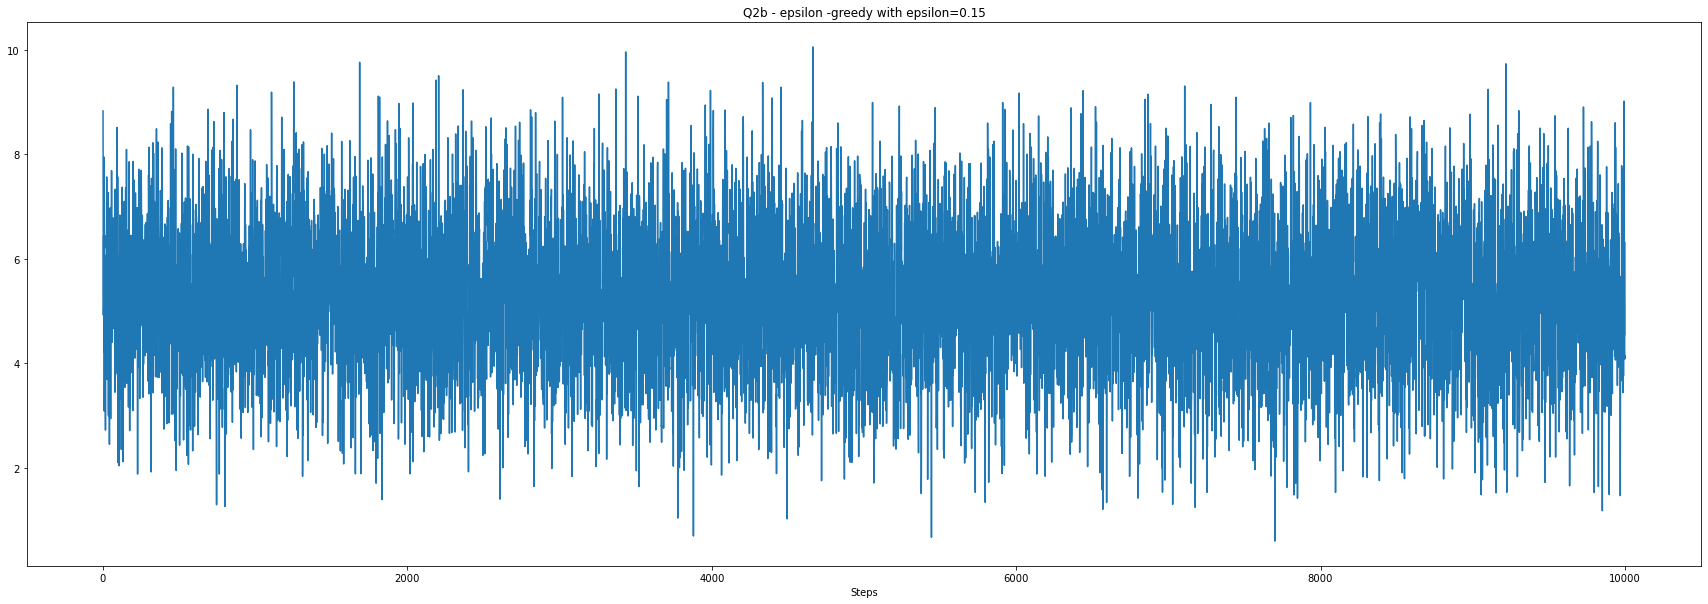

<Figure size 2160x720 with 0 Axes>

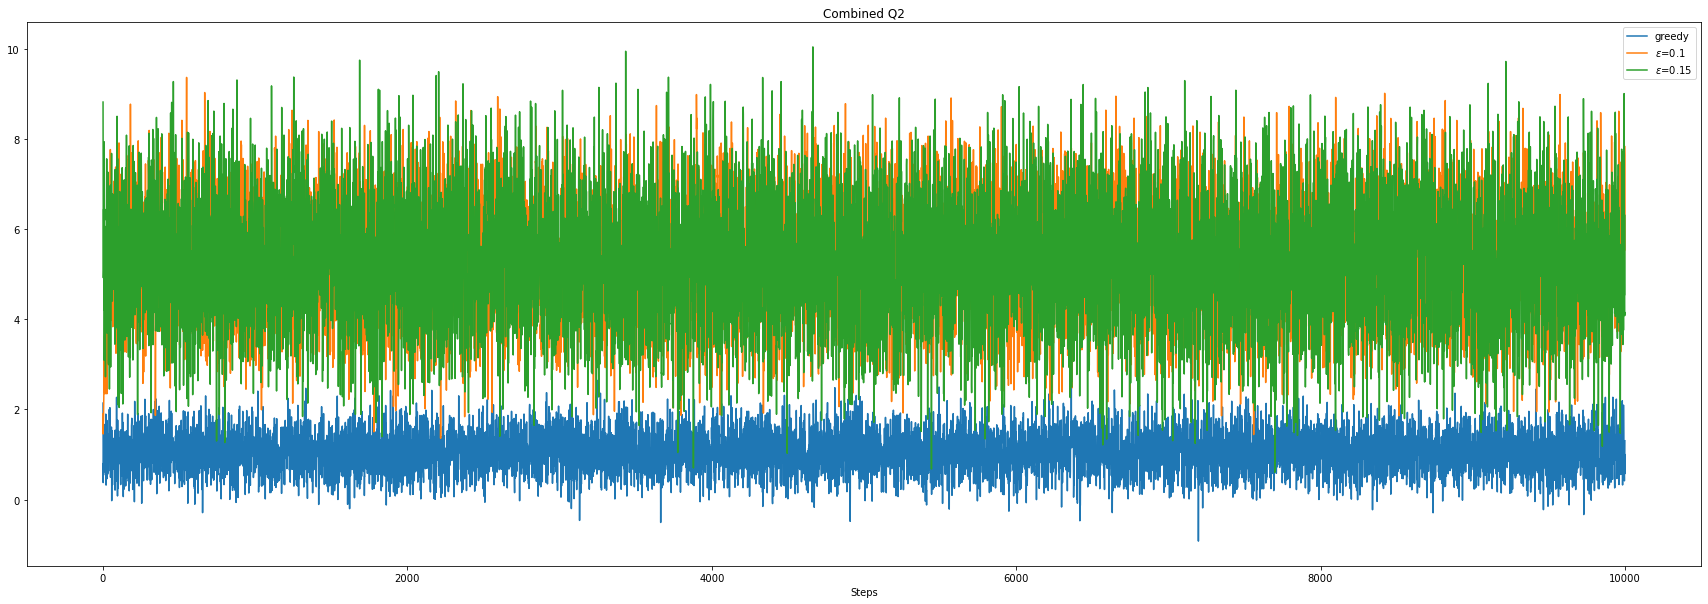

In [5]:
#Dynbandit RL agent, Template prepared by Kui Wu
# STUDENT CODE: FOLLOW THE TEMPLATE AND IMPLEMENT THE REQUIRED POLICY IN RL AGENT
# For simplicity, we do not write separate test code 


if __name__ == '__main__':    
    env = DynBandit()
    avg_reward = np.zeros(10000)
    
    plt.figure(figsize=(30,10))
    fig, ax1 = plt.subplots()
    fig.set_size_inches(30,10)
    #plt.rcParams.update({'font.size': 22})
    
    for _ in range(100):        
        env.reset()
        step_reward = np.zeros((10000,2))
        
        for i in range(10000):
            # Take a random action. 
        
            action = env.action_space.sample()
        
        # Note that You will need to replace the random policy with your implementation for other policies, i.e., greedy, and \epsilon-greedy.
        # write the code for other policies in the RL agent rather than the gym environment. 
            
            obs, reward, done, info = env.step(action)
        
            #print(action, reward) # print action, reward for TA to check if your reward function has been implemented correctly. 
            #print(type(reward))
        # Record reward, store historical rewards for calculation
            step_reward[i, :] = [i, reward]
    
        # reach 10000 steps. the end of this episode
        avg_reward += step_reward[:,1]
        #print(step_reward)
    # record/calculate the statistical result for the current episode
    #print(avg_reward)
    avg_reward /= 100
    #print(avg_reward)
    #print(step_reward)
    ax1.plot(avg_reward)
    ax1.set_title("Q2a - random action selected")
    ax1.set_xlabel("Steps")
    env.close()
    
#calculate the final statistical result 

# plot the final result by averaging the 100 episodes
    
    #Code for greedy action
    env1 = DynBandit()
    avg_reward_greedy = np.zeros(10000)
    plt.figure(figsize=(30,10))
    fig1, ax2 = plt.subplots()
    fig1.set_size_inches(30,10)
    
    for _ in range(100):
        env1.reset()
        reward_estimates = np.zeros(5)
        action_taken = np.zeros(5)
        step_reward_greedy = np.zeros((10000,2))
        
        for j in range(10000):
            
            action_greedy = np.argmax(reward_estimates)
            #print(reward_estimates)
            obs, reward_greedy, done, info = env1.step(action_greedy)
            step_reward_greedy[j,:] = [j, reward_greedy]
            action_taken[action_greedy] += 1
            reward_estimates[action_greedy] += (reward_greedy - reward_estimates[action_greedy])/action_taken[action_greedy]
            
        avg_reward_greedy += step_reward_greedy[:,1]
        
    avg_reward_greedy /= 100
    ax2.plot(avg_reward_greedy)
    ax2.set_title("Q2b - Greedy action selected")
    ax2.set_xlabel("Steps")
    
    env1.close()
    
    #Code for epsilon-greedy action epsilon = 0.1
    env2 = DynBandit()
    avg_reward_eps = np.zeros(10000)
    plt.figure(figsize=(30,10))
    fig2, ax3 = plt.subplots()
    fig2.set_size_inches(30,10)
    
    for _ in range(100):
        env2.reset()
        reward_estimates_eps = np.zeros(5)
        action_taken1 = np.zeros(5)
        step_reward_eps = np.zeros((10000,2))
        epsilon = 0.1
        
        for k in range(10000):
            
            if np.random.random() < epsilon:
                action_epsilon = np.random.randint(5)
            else:
                action_epsilon = np.argmax(reward_estimates_eps)
            
            obs, reward_epsilon, done, info = env2.step(action_epsilon)
            step_reward_eps[k,:] = [k, reward_epsilon]
            action_taken1[action_epsilon] += 1
            reward_estimates_eps[action_epsilon] += (reward_epsilon - reward_estimates_eps[action_epsilon])/action_taken1[action_epsilon]
        
        avg_reward_eps += step_reward_eps[:,1]
    
    avg_reward_eps /= 100
    ax3.plot(avg_reward_eps)
    ax3.set_title("Q2b - epsilon -greedy with epsilon=0.1")
    ax3.set_xlabel("Steps")
    env2.close()
    
    #Code for epsilon-greedy action epsilon = 0.15
    env3 = DynBandit()
    avg_reward_eps1 = np.zeros(10000)
    plt.figure(figsize=(30,10))
    fig3, ax4 = plt.subplots()
    fig3.set_size_inches(30,10)
    
    for _ in range(100):
        env3.reset()
        reward_estimates_eps1 = np.zeros(5)
        action_taken2 = np.zeros(5)
        step_reward_eps1 = np.zeros((10000,2))
        epsilon = 0.15
        
        for l in range(10000):
            
            if np.random.random() < epsilon:
                action_epsilon1 = np.random.randint(5)
            else:
                action_epsilon1 = np.argmax(reward_estimates_eps)
            
            obs, reward_epsilon1, done, info = env3.step(action_epsilon1)
            step_reward_eps1[l,:] = [l, reward_epsilon1]
            action_taken2[action_epsilon1] += 1
            reward_estimates_eps1[action_epsilon1] += (reward_epsilon1 - reward_estimates_eps1[action_epsilon1])/action_taken2[action_epsilon1]
        
        avg_reward_eps1 += step_reward_eps1[:,1]
    
    avg_reward_eps1 /= 100
    ax4.plot(avg_reward_eps1)
    ax4.set_title("Q2b - epsilon -greedy with epsilon=0.15")
    ax4.set_xlabel("Steps")
    env3.close()
    
    plt.figure(figsize=(30,10))
    fig4, ax5 = plt.subplots()
    fig4.set_size_inches(30,10)
    
    #ax5.plot(avg_reward, label=r"random")
    ax5.plot(avg_reward_greedy, label=r"greedy")
    ax5.plot(avg_reward_eps, label=r"$\epsilon$=0.1")
    ax5.plot(avg_reward_eps1, label=r"$\epsilon$=0.15")
    ax5.set_title("Combined Q2")
    ax5.set_xlabel("Steps")
    ax5.legend()
            